In [33]:

from ai import Agent 
import  matplotlib.pyplot as plt 

In [34]:
ag = Agent()

## MC run for states (10, 0, 5) and (20, 0, 5)

In [35]:
v = ag.MC_run(100000, False, True, )

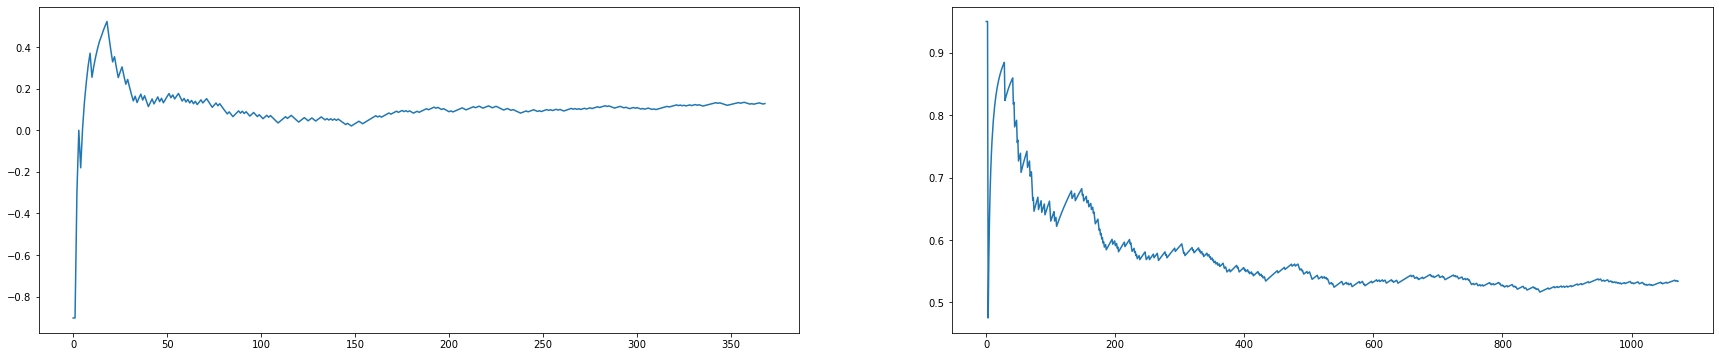

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))
# axes[1].set_xscale("log")
# axes[0].set_xscale("log")
axes[0].plot(range(len(v[(10, 0, 5)])), v[(10, 0, 5)])
axes[1].plot(range(len(v[(20, 0, 5)])), v[(20, 0, 5)])

## TD run for states (10, 0, 5) and (20, 0, 5)

In [37]:
v1 = ag.TD_run(200000, False, True)

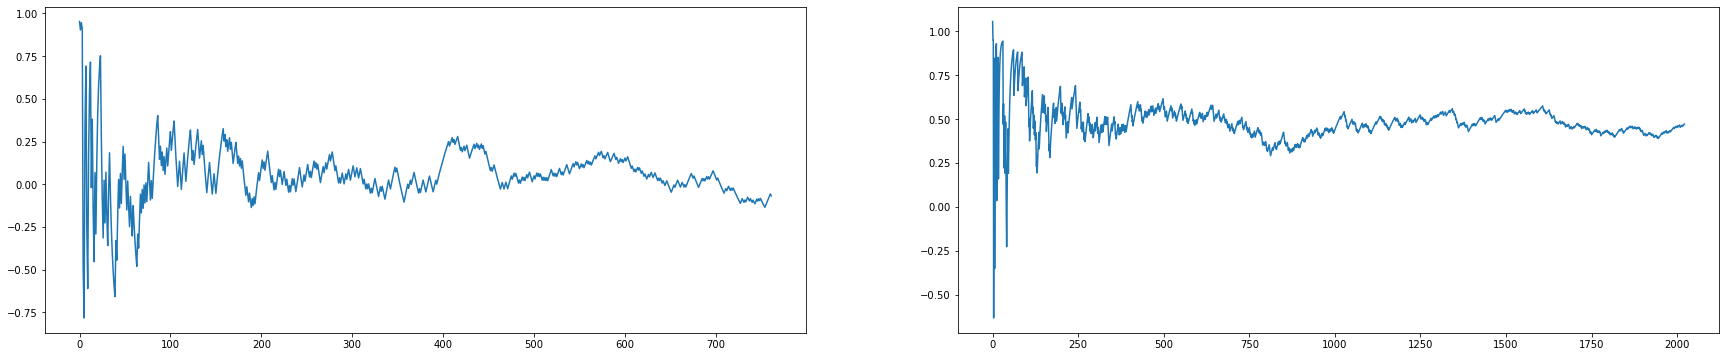

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))
axes[0].plot(range(len(v1[(10, 0, 5)])), v1[(10, 0, 5)])
axes[1].plot(range(len(v1[(20, 0, 5)])), v1[(20, 0, 5)])

## Decision convergence for Q run and cum_win rate


In [17]:
v1 = ag.Q_run(100000, False, print=True)

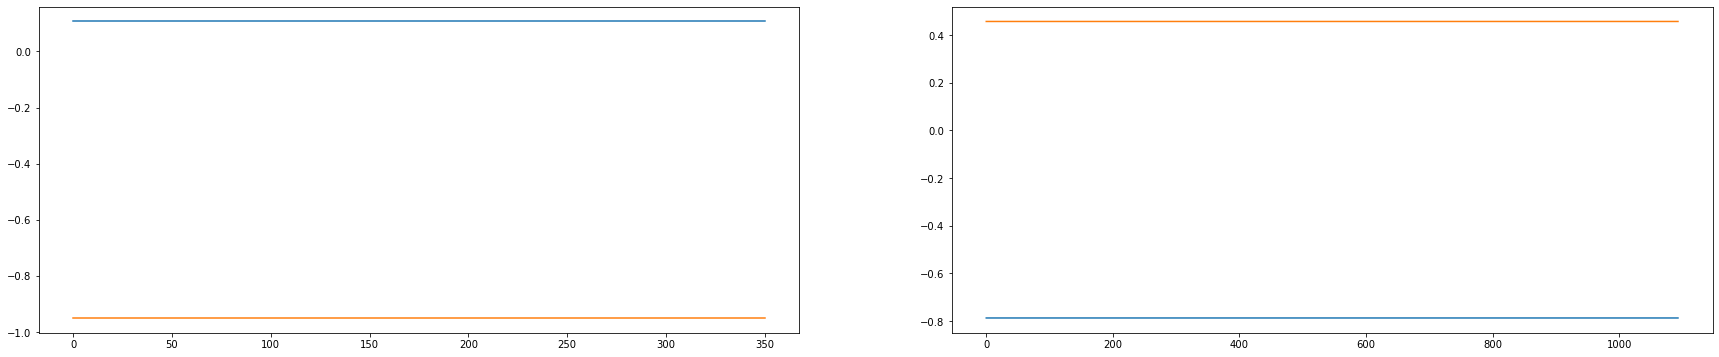

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))
axes[0].plot(range(len(v1[(10, 0, 5)])), v1[(10, 0, 5)])
axes[1].plot(range(len(v1[(20, 0, 5)])), v1[(20, 0, 5)])

In [30]:
def loop1(self):
        self.autoPlay = True
        tot_cum_tot_wins = []
        while len(tot_cum_tot_wins)<10000:          
            self.agent.Q_run(50)            
            if self.autoPlay:                
                if self.game.game_over() or self.game.stand:
                    self.game.update_stats()
                    self.game.reset()

                decision = self.agent.autoplay_decision(copy.deepcopy(self.game.state))
                if decision == 0:
                    self.game.act_hit()
                else:
                    self.game.act_stand()
                
                tot_cum_tot_wins.append(self.game.numWins/(self.game.numWins + self.game.numLoses) )  
                if tot_cum_tot_wins[-1] - tot_cum_tot_wins[-2]<0.1:
                    # Cumulative wins have converged.
                    break
        tot_cum_tot_wins = []            
                 

In [ ]:
from main import GameRunner
GameRunner.loop1= loop1
runner = GameRunner()
percentage_error_rate = runner.loop1()

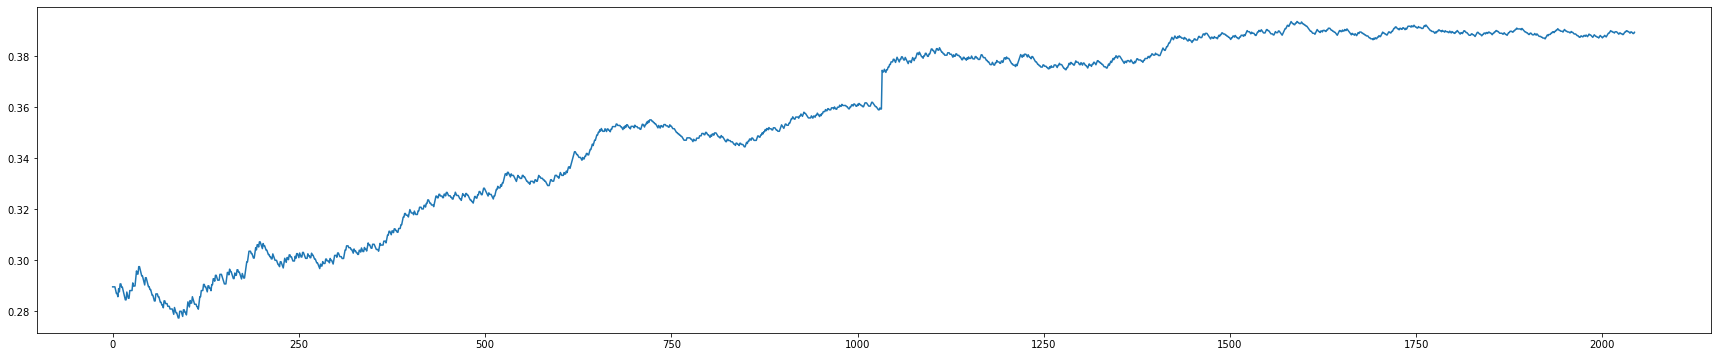

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 6))
axes.plot(range(len(percentage_error_rate)), percentage_error_rate)